#Task Name:IRIS FLOWER CLASSIFICATION DATA ANALYSIS


TASK-3

import python libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics  import classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
import warnings
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook

LOADING THE DATASET

In [ ]:
iris=pd.read_csv(r'/content/Iris.csv')

In [ ]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


DATA PROCESSING

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
iris.shape

(150, 6)

In [ ]:
iris.drop('Id',axis=1,inplace=True)

In [ ]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [ ]:
iris['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

This data set has three varities of Iris plant.

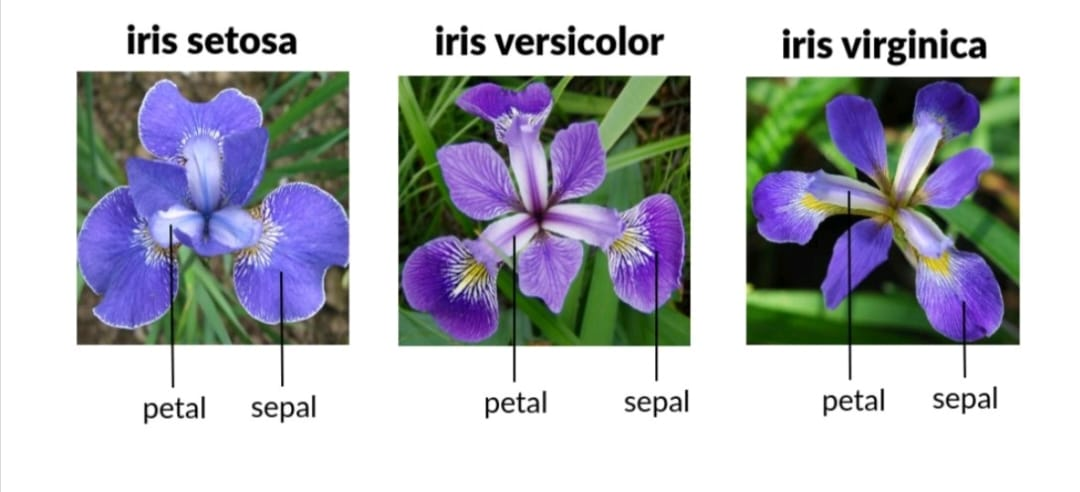

DATA VISUALISATION

Bargraph

<Axes: xlabel='Species', ylabel='count'>

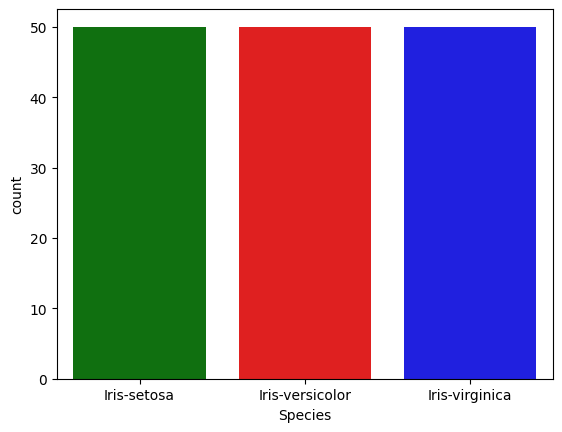

In [ ]:
custom_palette=['green','red','blue']
sns.countplot(x='Species',data=iris,palette=custom_palette)

Pairplot

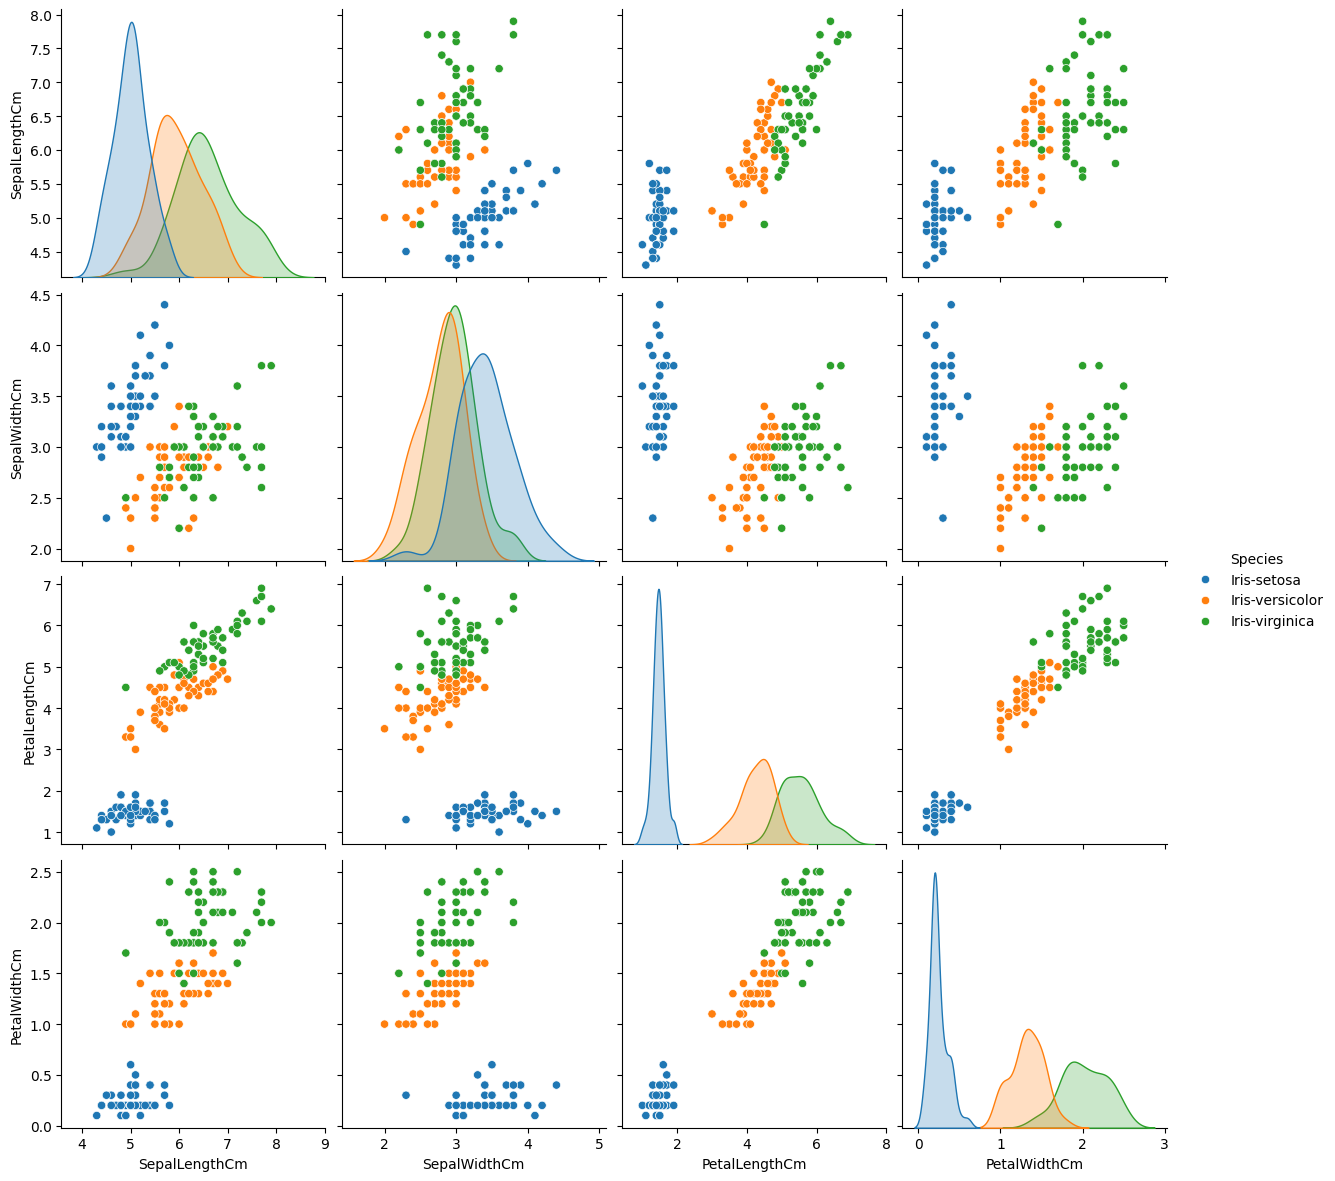

In [ ]:
sns.pairplot(data=iris,hue='Species',height=3)

Scatterplot

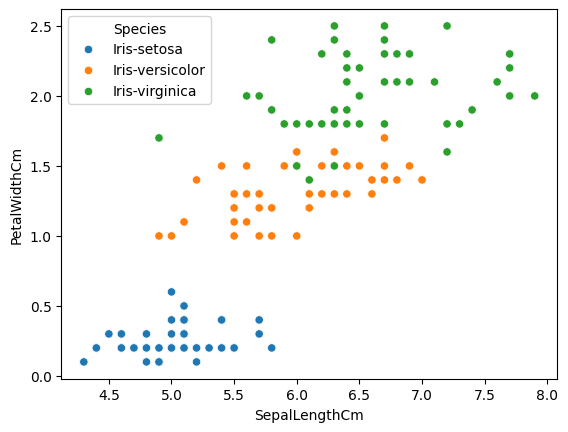

In [ ]:
sns.scatterplot(x='SepalLengthCm',y='PetalWidthCm',data=iris,hue='Species')
plt.show()

Pie Chart

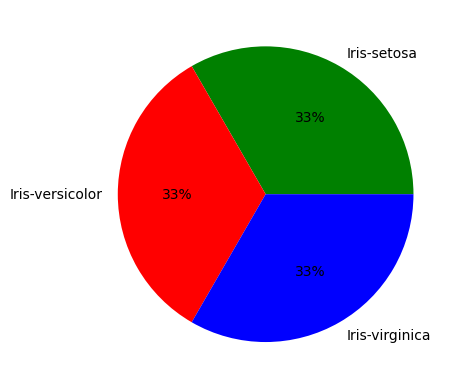

In [ ]:
spe_co=iris['Species'].value_counts()
colors=['green','red','blue']
plt.pie(spe_co,labels=spe_co.index,colors=colors,autopct='%1.f%%')
plt.show()

Boxplot

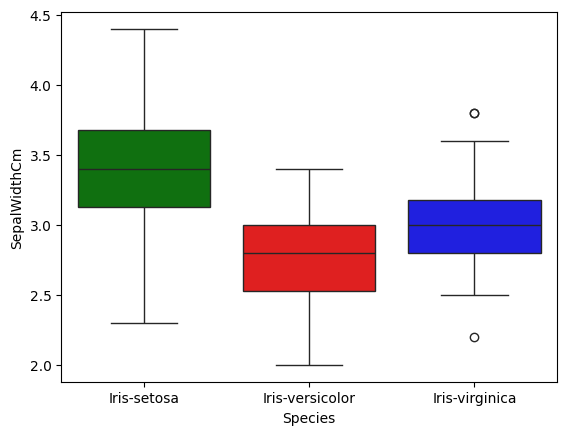

In [ ]:
color=['green','red','blue']
sns.boxplot(data=iris,x='Species',y='SepalWidthCm',palette=color)
plt.show()

HeatMap

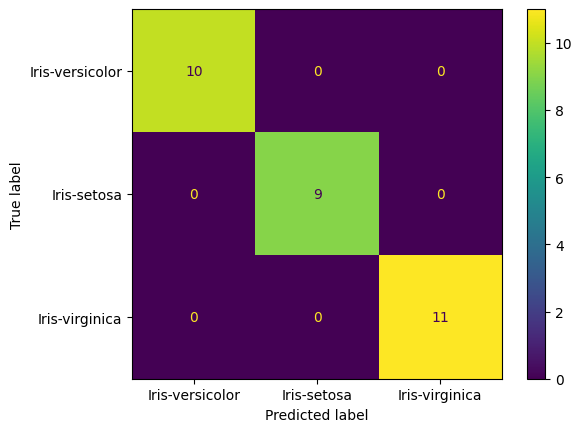

In [ ]:
labels=['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']
cmd=ConfusionMatrixDisplay(matrix,display_labels=labels)
cmd.plot()

SEPERATING X AND Y

In [ ]:
x=iris.iloc[:,:-1].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y=iris.iloc[:,-1].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

TRAIN TEST SPLIT

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,test_size=0.20,random_state=42)

In [ ]:
x_train

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [6.4, 3.2, 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [5.4, 3.9, 1.3, 0.4],
       [5.4, 3.7, 1.5, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2

In [ ]:
x_test

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2]])

In [ ]:
y_train

array(['Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris

In [ ]:
y_test

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

SCALING/NORMALISATION

In [ ]:
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
x_train

array([[0.08823529, 0.66666667, 0.        , 0.04166667],
       [0.41176471, 1.        , 0.0877193 , 0.125     ],
       [0.70588235, 0.45833333, 0.59649123, 0.54166667],
       [0.14705882, 0.58333333, 0.10526316, 0.04166667],
       [0.02941176, 0.5       , 0.05263158, 0.04166667],
       [0.58823529, 0.20833333, 0.70175439, 0.75      ],
       [0.61764706, 0.5       , 0.61403509, 0.58333333],
       [0.26470588, 0.625     , 0.0877193 , 0.04166667],
       [0.20588235, 0.66666667, 0.07017544, 0.04166667],
       [0.26470588, 0.875     , 0.0877193 , 0.        ],
       [0.44117647, 0.29166667, 0.71929825, 0.75      ],
       [0.5       , 0.58333333, 0.61403509, 0.625     ],
       [0.70588235, 0.45833333, 0.64912281, 0.58333333],
       [0.32352941, 0.79166667, 0.05263158, 0.125     ],
       [0.32352941, 0.70833333, 0.0877193 , 0.04166667],
       [0.35294118, 0.16666667, 0.47368421, 0.375     ],
       [0.58823529, 0.33333333, 0.71929825, 0.58333333],
       [0.61764706, 0.45833333,

In [ ]:
x_test

array([[0.52941176, 0.33333333, 0.64912281, 0.45833333],
       [0.41176471, 0.75      , 0.12280702, 0.08333333],
       [1.        , 0.25      , 1.03508772, 0.91666667],
       [0.5       , 0.375     , 0.61403509, 0.58333333],
       [0.73529412, 0.33333333, 0.66666667, 0.54166667],
       [0.32352941, 0.58333333, 0.0877193 , 0.125     ],
       [0.38235294, 0.375     , 0.45614035, 0.5       ],
       [0.76470588, 0.45833333, 0.71929825, 0.91666667],
       [0.55882353, 0.08333333, 0.61403509, 0.58333333],
       [0.44117647, 0.29166667, 0.50877193, 0.45833333],
       [0.64705882, 0.5       , 0.71929825, 0.79166667],
       [0.14705882, 0.41666667, 0.07017544, 0.        ],
       [0.35294118, 0.625     , 0.05263158, 0.04166667],
       [0.17647059, 0.45833333, 0.0877193 , 0.        ],
       [0.23529412, 0.75      , 0.0877193 , 0.08333333],
       [0.58823529, 0.54166667, 0.64912281, 0.625     ],
       [0.64705882, 0.41666667, 0.84210526, 0.875     ],
       [0.38235294, 0.20833333,

MODEL CREATION


CLASSIFICATION ALGORITHAMS

1)KNN--K-Nearest Neighbors algorithm

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred=knn.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [ ]:
y_test

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

2)Naive Bayes Algorithm

In [ ]:
naiv=GaussianNB()
naiv.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=naiv.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype='<U15')

3)Support Vector Machine Algorithm(SVM)

In [ ]:
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [ ]:
y_pred=sv.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

PERFORMANCE EVALUVATION

In [ ]:
report=classification_report(y_test,y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
score=accuracy_score(y_test,y_pred)
print(score)

1.0


In [ ]:
matrix=confusion_matrix(y_test,y_pred)
print(matrix)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
x_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(x_new)
print("Prediction: {}".format(prediction))

Prediction: ['Iris-virginica']


Since it is a good Model Predicted by KNN,Naive Bayes Algorithm,SVM